## Data Collection
The data we consider for the ESG evaluation is the text data in annual reports. These reports are published by companies each year in the form of 10-k and are accessible through [EDGAR](https://www.sec.gov/edgar/searchedgar/companysearch.html). We chose the annual reports of the company named "Citigroup". We save the data in *.txt* format.

We will convert the text data (unstructured data) in these reports to a data frame (structured format). Working with data in an organized way like a data frame is convenient and efficient.

In this tutorial, you’ll learn:

    How to convert the text data (unstructured data) to a data frame (structured data)
    How to use Pandas library

We downloaded the reports and made them accessible [here](https://drive.google.com/drive/folders/1BmZAgv764CBjyjeCJ_Bgchy13ig4cE0h?usp=sharing). Citigroup sometimes publishes more than one report annually. Most new publications are amended and complementary to the original report in that year. Therefore, we consider all reports published each year as 10-k. 

In [ ]:
# import libraries
import re
import numpy as np
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import pandas as pd
import nltk
import spacy
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!gdown --id 133LtGHkJgzFalTrlBipjorE9QAZZWo7i

Downloading...
From: https://drive.google.com/uc?id=133LtGHkJgzFalTrlBipjorE9QAZZWo7i
To: /content/2014-1.txt
100% 3.68M/3.68M [00:00<00:00, 128MB/s]


In [ ]:
#First read only one file 
path_to_file = '2014-1.txt'
with open(path_to_file, 'r', encoding='utf8') as f:
    contents = f.read()

In [ ]:
paragraphs = contents.split('\n\n')

In [ ]:
def remove_non_ASCII(data):
    return re.sub(r'[^\x00-\x7f]',r'', data)

def remove_punctuation(data):
    data = np.char.replace(data, "/", ' ')
    data = np.char.replace(data, "\t", '')
    symbols = "!\"#$%&()*+<=>@[\]^_`{|}~”,:;"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], '')
    return str(data)

def convert_lower_case(data):
  """convert text to lower case"""
  return str(np.char.lower(data))

def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())

def remove_numbers(text):
  text = re.sub(r" \d", "", text)
  return str(text)

def remove_stop_words(text):
  tokens = [x for x in  word_tokenize(convert_lower_case(text)) if x not in stop_words]
  return (" ").join(tokens)

def lemmatization(text):
  doc = nlp(text)
  mytokens = [word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in doc]
  return " ".join(mytokens)

def stemming(text):
  token_words=word_tokenize(text)
  token_words
  stem_sentence=[]
  for word in token_words:
      stem_sentence.append(porter.stem(word))
      stem_sentence.append(" ")
  return "".join(stem_sentence)

 

Now, we want to clean the paragraphs and split the paragraphs to sentences.

In [ ]:
def clean_paragraphs(paragraphs, min_len_sent=0):
    #combine all pre-processing functions
    #input: a list of paragraphs
    #output: a list of sentences'''
    cleaned_paragraphs = []
    for para in paragraphs:
        para = remove_non_ASCII(para)
        para = remove_punctuation(para)
        sents = sent_tokenize(para)
        for sen in sents:
            sen = remove_whitespace(sen)
            if len(sen)>min_len_sent:
                cleaned_paragraphs.append(sen)
    return cleaned_paragraphs

In [ ]:
text = ["Natural language processing (NLP) refers to the branch of computer science—and more specifically, the branch of artificial intelligence or AI—concerned with giving computers the ability to understand text and spoken words in much the same way human beings can.",\
        "Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.\
        The goal is a computer capable of understanding the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves." ]
clean_paragraphs(text)

['Natural language processing NLP refers to the branch of computer scienceand more specifically the branch of artificial intelligence or AIconcerned with giving computers the ability to understand text and spoken words in much the same way human beings can.',
 'Natural language processing NLP is a subfield of linguistics computer science and artificial intelligence concerned with the interactions between computers and human language in particular how to program computers to process and analyze large amounts of natural language data.',
 'The goal is a computer capable of understanding the contents of documents including the contextual nuances of the language within them.',
 'The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.']

In [ ]:
# Create a dataframe
df = pd.DataFrame(columns=['Sentences', 'Lowered_case', 'Number_removed', 'No_stop_words', 'Stemmed', 'Lemmatized', 'Year', 'Length'])

In [ ]:
sentences = clean_paragraphs(paragraphs)
sentences = list(set(sentences))
year = [path_to_file.split('.')[0].split('-')[0]]

In [ ]:
df['Sentences'] = sentences
df['Lowered_case'] = [convert_lower_case(sen) for sen in sentences]
df['Number_removed'] = [remove_whitespace(remove_numbers(convert_lower_case(sen))) for sen in sentences]
df['No_stop_words'] = df.apply(lambda df: remove_stop_words(df['Number_removed']), axis = 1)
df['Stemmed'] = df.apply(lambda df: stemming(df['No_stop_words']), axis = 1)
df['Lemmatized'] = df.apply(lambda df: lemmatization(df['No_stop_words']), axis = 1)
df['Year'] = year * len(sentences)
df['Length'] = [len(sen) for sen in df.Number_removed.to_list()]

In [ ]:
df.head()

,Sentences,Lowered_case,Number_removed,No_stop_words,Stemmed,Lemmatized,Year,Length
0,The pretax gain loss recorded in the Foreign c...,the pretax gain loss recorded in the foreign c...,the pretax gain loss recorded in the foreign c...,pretax gain loss recorded foreign currency tra...,pretax gain loss record foreign currenc transl...,pretax gain loss record foreign currency trans...,2014,293
1,At December 31 2013 28.7 billion of home equit...,at december 31 2013 28.7 billion of home equit...,at december10138.7 billion of home equity loan...,december10138.7 billion home equity loans reco...,december10138.7 billion home equiti loan recor...,december10138.7 billion home equity loan recor...,2014,128
2,Prior service benefit cost,prior service benefit cost,prior service benefit cost,prior service benefit cost,prior servic benefit cost,prior service benefit cost,2014,26
3,Supplemental ERISA Compensation Plan of Citiba...,supplemental erisa compensation plan of citiba...,supplemental erisa compensation plan of citiba...,supplemental erisa compensation plan citibank ...,supplement erisa compens plan citibank n.a .,supplemental erisa compensation plan citibank ...,2014,53
4,Credit Costs and Allowance for Loan Losses,credit costs and allowance for loan losses,credit costs and allowance for loan losses,credit costs allowance loan losses,credit cost allow loan loss,credit cost allowance loan loss,2014,42


In [ ]:
df.shape

(8982, 8)

In [ ]:
# Drop rows with lenght less than 10
df = df.drop(df[df.Length < 10].index)

In [ ]:
df.shape

(8982, 8)

In [ ]:
df.Length.describe()

count    8982.000000
mean      188.123135
std       201.744387
min        18.000000
25%        71.000000
50%       145.000000
75%       233.000000
max      4983.000000
Name: Length, dtype: float64

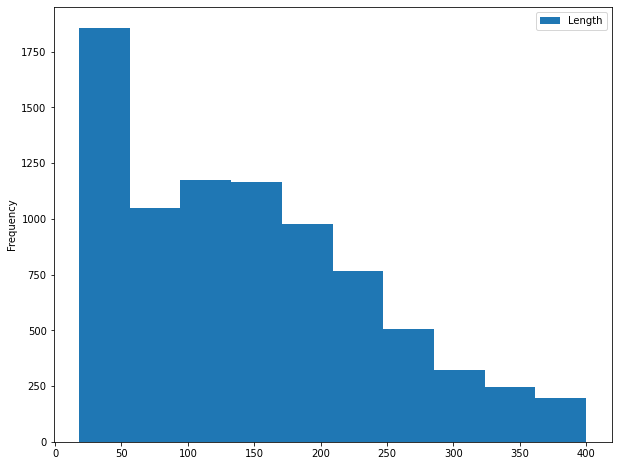

In [ ]:
df.plot.hist(by="Length",figsize=(10, 8))

In [ ]:
# Drop rows with lenght less than 10
df = df.drop(df[df.Length > 400].index)

In [ ]:
df.shape

(8261, 8)

In [ ]:
df.Length.describe()

count    8261.000000
mean      145.342331
std        93.675800
min        18.000000
25%        65.000000
50%       134.000000
75%       207.000000
max       400.000000
Name: Length, dtype: float64

In [ ]:
#Save data as csv
df.to_csv('data.csv')

# **Assignment**
Instead of removing rows with more than a specific length, try to split this text into a text with a smaller length. You might need to count the number of words.